In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [6]:
# もとの配列の形状ではなくインデックス配列の形状が反映
ind = np.array([[3, 7], [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [7]:
X = np.arange(12).reshape(3, 4)
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [8]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [9]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [10]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [11]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [12]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [13]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [14]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [15]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

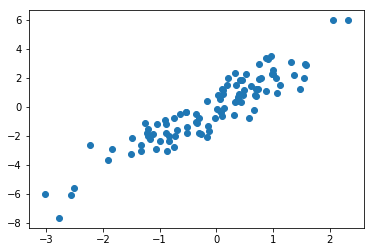

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set #for plot styling

plt.scatter(X[:, 0], X[:, 1]);#散布図

In [22]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([ 8, 10, 49, 65, 96, 88, 33, 98,  0, 80, 40, 71, 44, 11, 12, 43, 38,
       61, 73, 23])

In [23]:
selection = X[indices] #fancy indexing here
selection.shape

(20, 2)

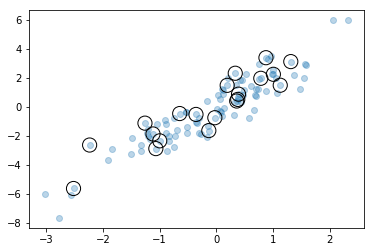

In [51]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1], facecolor='none', s=200, edgecolor='black');

In [63]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99 # 要素の数番目を99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [72]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


In [75]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [76]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [77]:
x = np.zeros(10)
np.add.at(x, i, 1) #x[2]を+1、x[3]を+2、x[4]を+3
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [132]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)
print(bins)
# find the appropriarte bin for each x
i = np.searchsorted(bins, x)
print(i)

#add 1 to each of these bins
np.add.at(counts, i, 1)
print(counts)

[-5.         -4.47368421 -3.94736842 -3.42105263 -2.89473684 -2.36842105
 -1.84210526 -1.31578947 -0.78947368 -0.26315789  0.26315789  0.78947368
  1.31578947  1.84210526  2.36842105  2.89473684  3.42105263  3.94736842
  4.47368421  5.        ]
[11 10 11 13 10 10 13 11  9 11  9  9 10  6  7  9  8 11  8  7 13 10 10  7
  9 10  8 11  9  9  9 14 10  8 12  8 10  6  7 10 11 10 10  9  7  9  9 12
 11  7 11  9  9 11 12 12  8  9 11 12  9 10  8  8 12 13 10 12 11  9 11 13
 10 13  5 12 10  9 10  6 10 11 13  9  8  9 12 11  9 11 10 12  9  9  9  7
 11 10 10 10]
[ 0.  0.  0.  0.  0.  1.  3.  7.  9. 23. 22. 17. 10.  7.  1.  0.  0.  0.
  0.  0.]


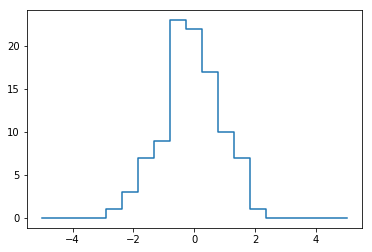

In [133]:
# plot the results
plt.plot(bins, counts, linestyle='steps'); # plt.hist(x, bins, histtype='step');

In [114]:
print('numpy routine:')
%timeit counts, edges = np.histogram(x, bins)

print('custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

numpy routine:
47.9 µs ± 318 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
custom routine:
12.7 µs ± 36.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [123]:
x = np.random.randn(1000000)
print('nupmy routine:')
%timeit counts, edges = np.histogram(x, bins)

print('custom routine:')
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

nupmy routine:
61.9 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
custom routine:
104 ms ± 604 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
